# Problem statement

Linear_Regression_assignment_1

1) Delivery_time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [36]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

import scipy.stats as stats

##### Reading CSV

In [37]:
raw_data1= pd.read_csv(r"C:\Users\Training Team\Desktop\ExcelR\Assignments\4_linear regression\delivery_time.csv")
raw_data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [38]:
raw_data= raw_data1.copy()

# *Asking Basic questions on data*

**1. What is shape of data?** 

In [39]:
raw_data.shape

(21, 2)

**2. How does the data look like?**

In [40]:
raw_data.sample(5)

,Delivery Time,Sorting Time
12,16.68,7
16,13.75,6
17,18.11,7
18,8.00,2
7,9.50,3


**3. What are the data type of features in data?**

In [41]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


**4. Any missing values in data?**

In [42]:
raw_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

**5. Any duplicate values in data?**

In [43]:
raw_data.duplicated().sum()

0

**6. How does the data look numerically?**

In [44]:
raw_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**7. Correlation between independant and dependant variable?**

In [45]:
raw_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


###### here Corr value for Dlivery time and sorting time is 0.8259. hence both variables are mediumly correlated

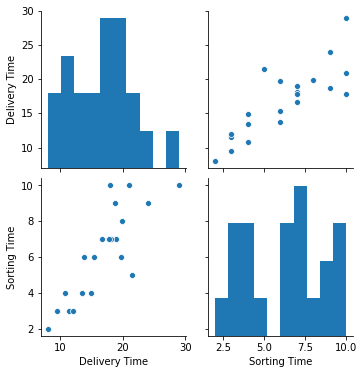

In [46]:
sns.pairplot(raw_data)

###### we can see that as Delivery Time	 increases, the Sorting Time aslo increases linearly

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

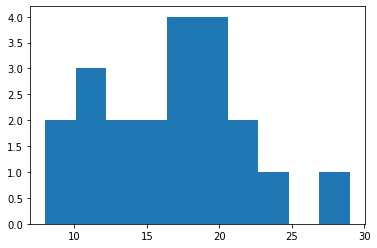

In [47]:
plt.hist(raw_data['Delivery Time'], bins=10)

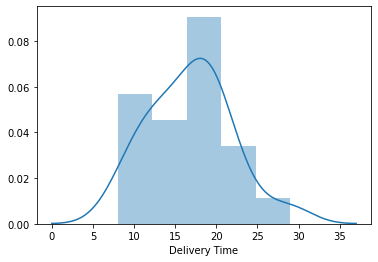

In [48]:
sns.distplot(raw_data['Delivery Time'])

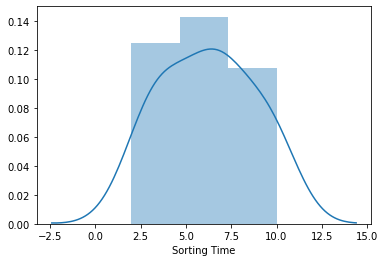

In [49]:
sns.distplot(raw_data['Sorting Time'])

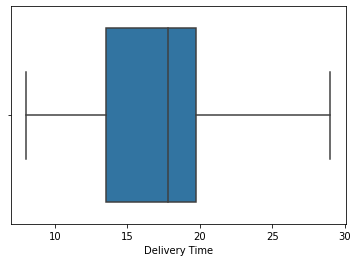

In [50]:
sns.boxplot(raw_data['Delivery Time'])

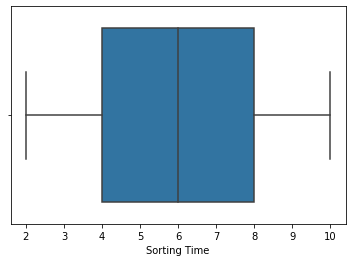

In [51]:
sns.boxplot(raw_data['Sorting Time'])

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([ 8.  ,  9.5 , 10.75, 11.5 , 12.03, 13.5 , 13.75, 14.88, 15.35,
         16.68, 17.83, 17.9 , 18.11, 18.75, 19.  , 19.75, 19.83, 21.  ,
         21.5 , 24.  , 29.  ])),
 (5.267571141566631, 16.79095238095238, 0.9870617551853575))

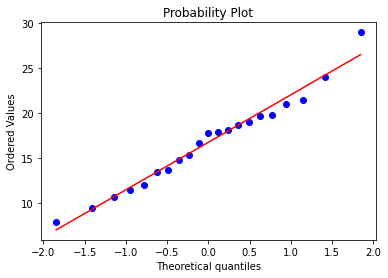

In [52]:
stats.probplot(raw_data['Delivery Time'], dist= 'norm', plot= plt)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([ 2,  3,  3,  3,  4,  4,  4,  5,  6,  6,  6,  7,  7,  7,  7,  8,  9,
          9, 10, 10, 10], dtype=int64)),
 (2.6138845546312792, 6.190476190476191, 0.9778395671991297))

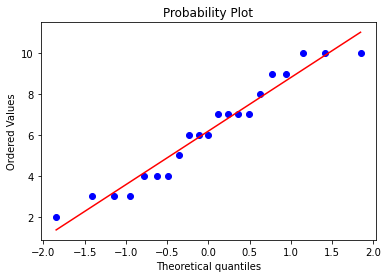

In [53]:
stats.probplot(raw_data['Sorting Time'], dist= 'norm', plot= plt)

##### Fitting a linear regression model

In [54]:
raw_data=raw_data.rename(columns={"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime" })
raw_data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [55]:
model = smf.ols("DeliveryTime~SortingTime", data= raw_data).fit()

# we dont need any space in feature names for smf.ols function arguments

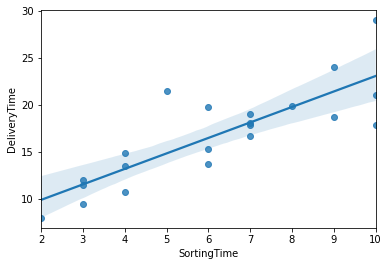

In [56]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=raw_data)

In [57]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [58]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [59]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [60]:
y_pred= model.predict(raw_data['SortingTime'])

In [61]:
RMSE= rmse(raw_data['DeliveryTime'], y_pred)
RMSE

2.7916503270617654

In [62]:
#Predict for 14, 15 and 18 of sorting time
newdata=pd.Series([6, 7, 3])

In [63]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [64]:
model.predict(data_pred)

0    16.476853
1    18.125873
2    11.529794
dtype: float64

In [65]:
import pickle

In [66]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))